In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import csv

# Load the World Bank Group dataset

file_path = r'C:\Users\Mateus\Desktop\Mateus\Projetos_Data_Science\GitHub\foreign-aid-sector-analysis\data\wbg_data.csv'
df = pd.read_csv(file_path, quotechar='"', encoding='utf-8', on_bad_lines='skip')

# Quick inspection
df.head()


,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Afghanistan,AFG,Net official development assistance and offici...,DT.ODA.ALLD.CD,136009994.506836,410359985.351563,1223290039.0625,1538229980.46875,2268530029.29688,2815100097.65625,...,4274229980.46875,4069409912.10938,3811739990.23438,3792489990.23438,4136990234.375,4208899902.34375,4690520019.53125,3893270019.53125,..,..
1,Africa Eastern and Southern,AFE,Net official development assistance and offici...,DT.ODA.ALLD.CD,7995110001.56403,8510100046.15784,11407200153.3508,16522039883.6136,16249479990.9592,16411430004.1199,...,25497109967.7086,25069150086.4029,27881609782.219,27525489810.9436,30202910114.2884,..,..,..,..,..
2,Africa Western and Central,AFW,Net official development assistance and offici...,DT.ODA.ALLD.CD,4049070066.45203,4705749979.97284,6247569955.82581,6514859987.25891,8213159975.05188,14364720142.3645,...,14652700120.9259,13834239950.1801,15917469878.6736,16573919943.3327,18431019996.6431,..,..,..,..,..
3,Albania,ALB,Net official development assistance and offici...,DT.ODA.ALLD.CD,317850006.103516,268529998.779297,307359985.351563,349309997.558594,300940002.441406,315079986.572266,...,335160003.662109,171039993.286133,168350006.103516,344519989.013672,27069999.6948242,309579986.572266,633419982.910156,315510009.765625,..,..
4,Algeria,DZA,Net official development assistance and offici...,DT.ODA.ALLD.CD,199960006.713867,198860000.610352,186119995.117188,239240005.493164,316970001.220703,347380004.882813,...,71129997.253418,144539993.286133,174649993.896484,144610000.610352,172000000,209850006.103516,214449996.948242,214990005.493164,..,..


In [ ]:
# Cleanning and organizing the data
# Remove unnecessary columns
df = df.drop(columns=['Series Code', '2024 [YR2024]'])
# Rename columns for better readability
df = df.rename(columns={
    'Country Name': 'Country',
    'Country Code': 'Country Code',
    '2000 [YR2000]': '2000',
    '2001 [YR2001]': '2001',
    '2002 [YR2002]': '2002',
    '2003 [YR2003]': '2003',
    '2004 [YR2004]': '2004',
    '2005 [YR2005]': '2005',
    '2006 [YR2006]': '2006',
    '2007 [YR2007]': '2007',
    '2008 [YR2008]': '2008',
    '2009 [YR2009]': '2009',
    '2010 [YR2010]': '2010',
    '2011 [YR2011]': '2011',
    '2012 [YR2012]': '2012',
    '2013 [YR2013]': '2013',
    '2014 [YR2014]': '2014',
    '2015 [YR2015]': '2015',
    '2016 [YR2016]': '2016',
    '2017 [YR2017]': '2017',
    '2018 [YR2018]': '2018',
    '2019 [YR2019]': '2019',
    '2020 [YR2020]': '2020',
    '2021 [YR2021]': '2021',
    '2022 [YR2022]': '2022',
    '2023 [YR2023]': '2023'})
df.head()

,Country,Country Code,Series Name,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,Net official development assistance and offici...,136009994.506836,410359985.351563,1223290039.0625,1538229980.46875,2268530029.29688,2815100097.65625,2895830078.125,...,4942970214.84375,4274229980.46875,4069409912.10938,3811739990.23438,3792489990.23438,4136990234.375,4208899902.34375,4690520019.53125,3893270019.53125,..
1,Africa Eastern and Southern,AFE,Net official development assistance and offici...,7995110001.56403,8510100046.15784,11407200153.3508,16522039883.6136,16249479990.9592,16411430004.1199,18452829945.5643,...,25900260070.8008,25497109967.7086,25069150086.4029,27881609782.219,27525489810.9436,30202910114.2884,..,..,..,..
2,Africa Western and Central,AFW,Net official development assistance and offici...,4049070066.45203,4705749979.97284,6247569955.82581,6514859987.25891,8213159975.05188,14364720142.3645,20366009918.2129,...,14729140147.686,14652700120.9259,13834239950.1801,15917469878.6736,16573919943.3327,18431019996.6431,..,..,..,..
3,Albania,ALB,Net official development assistance and offici...,317850006.103516,268529998.779297,307359985.351563,349309997.558594,300940002.441406,315079986.572266,324040008.544922,...,281170013.427734,335160003.662109,171039993.286133,168350006.103516,344519989.013672,27069999.6948242,309579986.572266,633419982.910156,315510009.765625,..
4,Algeria,DZA,Net official development assistance and offici...,199960006.713867,198860000.610352,186119995.117188,239240005.493164,316970001.220703,347380004.882813,240679992.675781,...,160619995.117188,71129997.253418,144539993.286133,174649993.896484,144610000.610352,172000000,209850006.103516,214449996.948242,214990005.493164,..


In [20]:
#Convert all year columns to numeric
year_columns = df.columns[3:]  # All columns except 'Country', 'Country Code' and Series Name
for col in year_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       253 non-null    object 
 1   Country Code  253 non-null    object 
 2   Series Name   253 non-null    object 
 3   2000          211 non-null    float64
 4   2001          210 non-null    float64
 5   2002          210 non-null    float64
 6   2003          211 non-null    float64
 7   2004          211 non-null    float64
 8   2005          182 non-null    float64
 9   2006          182 non-null    float64
 10  2007          182 non-null    float64
 11  2008          181 non-null    float64
 12  2009          182 non-null    float64
 13  2010          181 non-null    float64
 14  2011          179 non-null    float64
 15  2012          176 non-null    float64
 16  2013          176 non-null    float64
 17  2014          175 non-null    float64
 18  2015          175 non-null    

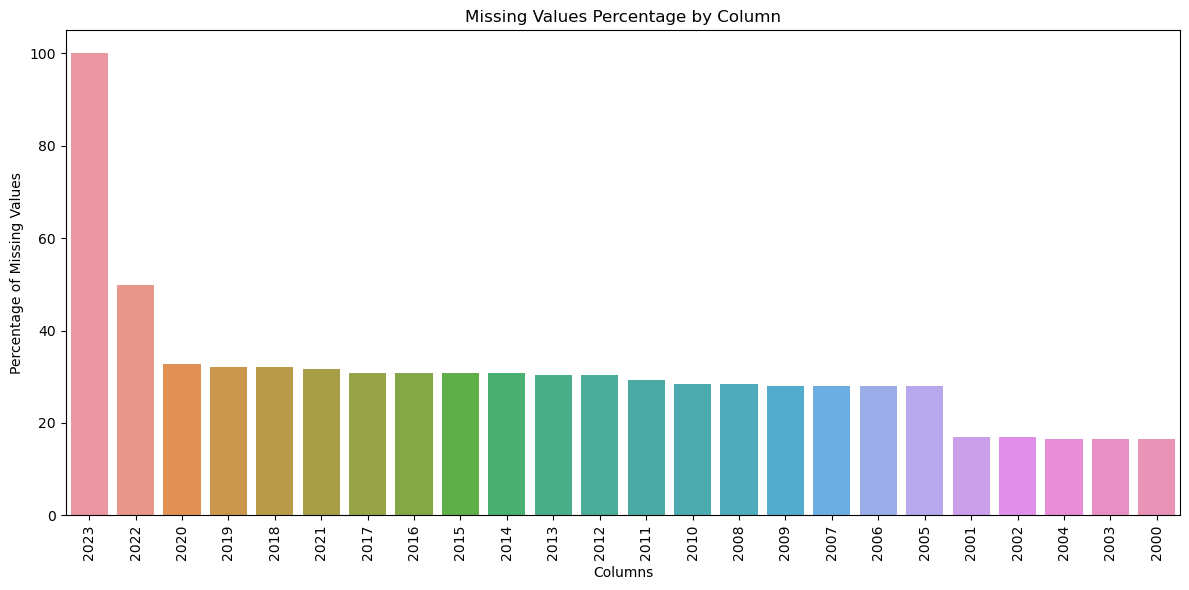

In [21]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values_percentage = (missing_values / len(df)) * 100
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0]
missing_values_percentage = missing_values_percentage.sort_values(ascending=False)
missing_values_percentage
# Plot missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values_percentage.index, y=missing_values_percentage.values)
plt.xticks(rotation=90)
plt.title('Missing Values Percentage by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.tight_layout()
plt.show()

In [33]:
#Create a map gif that shows the evolution of the data over the years(columns)
# Filter the DataFrame to include only the relevant columns
df_map = df[['Country', 'Country Code'] + list(year_columns)]
# Melt the DataFrame to long format
df_map_melted = df_map.melt(id_vars=['Country', 'Country Code'], var_name='Year', value_name='Value')
# Convert the 'Year' column to numeric
df_map_melted['Year'] = pd.to_numeric(df_map_melted['Year'], errors='coerce')
# Filter out rows with NaN values in 'Value' or 'Year'
df_map_melted = df_map_melted.dropna(subset=['Value', 'Year'])
# Create a map gif
fig = px.choropleth(df_map_melted,
                    locations='Country Code',
                    locationmode='ISO-3',
                    color='Value',
                    hover_name='Country',
                    animation_frame='Year',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='World Bank Data by Country and Year',
                    projection='natural earth')
fig.update_geos(showcoastlines=True, coastlinecolor='Black', showland=True, landcolor='LightGray')
fig.update_layout(title_text='World Bank Data by Country and Year', title_x=0.5)
fig.update_traces(marker_line_width=0.5, marker_line_color='Black')
fig.show()

In [35]:
## Working with OECD dataset
# Load the OECD dataset via API

import requests
import json

# Example query: Get CRS aid flows by donor, sector, year
base_url = "https://stats.oecd.org/SDMX-JSON/data/CRS1"


# Parameters:
# Format: DONOR+RECIPIENT+SECTOR+FLOW+AIDTYPE+FINANCE+CHANNEL+BI_MULTI+YEAR
# We'll simplify: e.g., donor=USA, Germany; recipient=all; sector=all; years=2005–2022
donors = ['USA', 'DEU', 'GBR', 'JPN', 'BRA']
years = [str(y) for y in range(2005, 2023)]

# We will loop over donor countries and retrieve one-by-one
data_frames = []

for donor in donors:
    url = f"{base_url}/{donor}.ALL.ALL.TOTAL.TOTAL.TOTAL.TOTAL.TOTAL/{'+'.join(years)}?dimensionAtObservation=AllDimensions&detail=code"
    print(f"Fetching {donor}...")
    
    response = requests.get(url)
    data = response.json()
    
    # Flatten the JSON structure into a DataFrame
    obs = data['data']['observations']
    series = data['structure']['dimensions']['observation']
    
    sector_index = [i for i, dim in enumerate(series) if dim['id'] == 'SECTOR'][0]
    year_index = [i for i, dim in enumerate(series) if dim['id'] == 'TIME_PERIOD'][0]
    sectors = series[sector_index]['values']
    years = series[year_index]['values']

    for key, value in obs.items():
        keys = list(map(int, key.split(':')))
        sector = sectors[keys[sector_index]]['name']
        year = years[keys[year_index]]['id']
        amount = value[0]
        
        data_frames.append({
            'Donor': donor,
            'Year': year,
            'Sector': sector,
            'Amount_Constant_USD': amount
        })

df = pd.DataFrame(data_frames)

# Save to CSV
df.to_csv('data/foreign_aid_oecd_api.csv', index=False)
print("Data saved to data/foreign_aid_oecd_api.csv")

Fetching USA...


JSONDecodeError: Expecting value: line 1 column 1 (char 0)